In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm

# from spatgames import MeanGamePy as MeanGame
# from spatgames import color_field_change

# from meangame import SpatialGame as MeanGame

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
import seaborn as sns
import pandas as pd

In [3]:
plt.style.use("seaborn-whitegrid")
plt.rcParams["axes.grid"] = False

## One defector

<IPython.core.display.Javascript object>


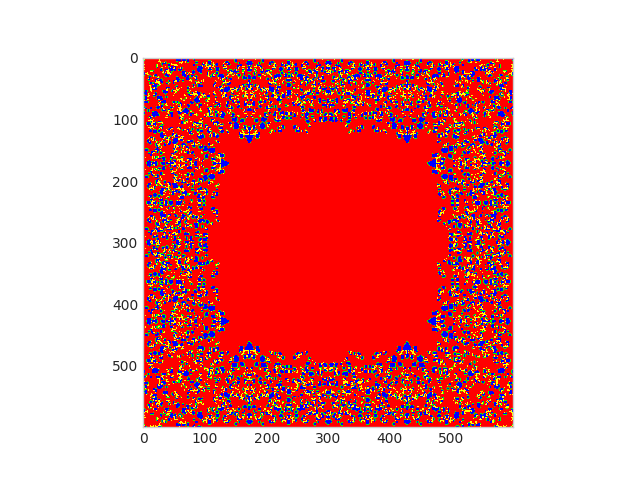

In [3]:
L = 600
p_c_ = .5
b = 1.59
np.random.seed(45)
field = np.random.choice((0, 1), (L, L), p=(1-p_c_, p_c_))
field = np.ones((L, L), dtype=int)
# draw the initial field
fig = plt.figure()
im = plt.imshow(make_rgb(field), animated=True, cmap=plt.get_cmap('Paired'))
# ax.grid(False)

# updater function
def updatefig(frame):
    if frame < 3:
        return im,
    global field
    field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    im.set_array(coll)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=150, blit=True)

plt.show()

## Evolution in the top sector of the game with one defector

In [ ]:
L = 200
p_c_ = .5
b = 1.59
# np.random.seed(45)
# field = np.random.choice((0, 1), (L, L), p=(1-p_c_, p_c_))
field = np.ones((L, L), dtype=int)
# field[30:32, 30:32] = np.zeros((2, 2), dtype=int)
field[L//2, L//2] = 0

# time_text = plt.text(2, 6, "0")
# draw the initial field
fig = plt.figure()
im = plt.imshow(make_rgb(field)[:L//2, L//4:3*L//4], animated=True, cmap=plt.get_cmap('Paired'))
# ax.grid(False)

# updater function
def updatefig(frame):
    if frame < 3:
        return im,
    global field
    field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    im.set_array(coll[:L//2, L//4:3*L//4])
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=150, blit=True)

plt.show()

## Random field

<IPython.core.display.Javascript object>


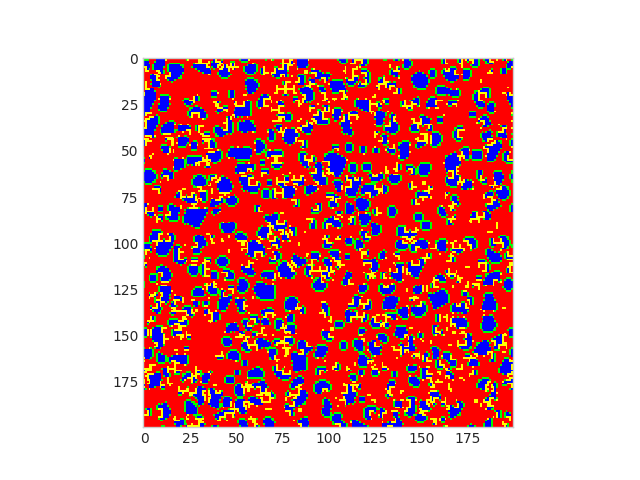

In [27]:
L = 200
p_c_ = .5
b = 1.59
# np.random.seed(45)
field = np.random.choice((0, 1), (L, L), p=(1-p_c_, p_c_))

# draw the initial field
fig = plt.figure()
im = plt.imshow(make_rgb(field), animated=True, cmap=plt.get_cmap('Paired'))
# ax.grid(False)

# updater function
def updatefig(frame):
    if frame < 3:
        return im,
    global field
    field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    im.set_array(coll)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=150, blit=True)

plt.show()

# N-M and clusters

In [4]:
bs = [1.5       , 1.50689655, 1.5137931 , 1.52068966, 1.52758621,
      1.53448276, 1.54137931, 1.54827586, 1.55517241, 1.56206897,
      1.56896552, 1.57586207, 1.58275862, 1.58965517, 1.59655172,
      1.60344828, 1.61034483, 1.61724138, 1.62413793, 1.63103448,
      1.63793103, 1.64482759, 1.65172414, 1.65862069]
nm = np.load("data/200x200run/nmdistribution.npy").reshape((-1, 9, 9))
cluster_sizes = np.load("data/200x200run/clustersizedist.npy")
persistence = np.load("data/200x200run/persistence.npy")
density = np.load("data/200x200run/density.npy")

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'))

<IPython.core.display.Javascript object>


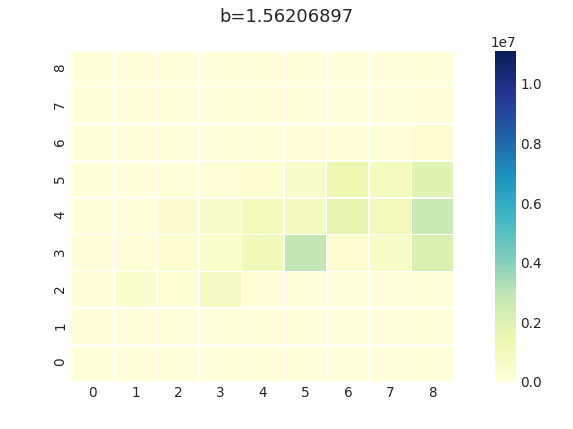

In [42]:
# fig = plt.figure(figsize=(10,6))
# plt.xlim(1999, 2016)
# plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
grid_kws = {"width_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(1, 2, gridspec_kw=grid_kws)
# plt.xlabel('N',fontsize=20)
# plt.ylabel('M',fontsize=20)
# plt.title('N-M distribution',fontsize=20)

mx = nm.max()
sns.heatmap(nm[0][::-1], linewidth=0.5, yticklabels=range(8, -1, -1), cmap="YlGnBu",ax=ax,
                     cbar_ax=cbar_ax,
                     vmax=mx,
                     cbar_kws={"orientation": "vertical"})
def animate(i):
#     data = overdose.iloc[:int(i+1)] #select data range
    plt.suptitle(f"b={bs[i]}")
    p = sns.heatmap(nm[i][::-1], linewidth=0.5, yticklabels=range(8, -1, -1), cmap="YlGnBu",ax=ax,
                     cbar_ax=cbar_ax,
                    vmax=mx,
                     cbar_kws={"orientation": "vertical"})
#     p.tick_params(labelsize=17)
#     plt.setp(p.lines,linewidth=7)
    
ani = animation.FuncAnimation(f, animate, frames=24, repeat=True)
ani.save("nmdistribution.mp4", writer=writer, dpi=300)

In [7]:
i = 0
max_s = 250
clusts = {
    "class": ['D']*(max_s-2) + ['C']*(max_s-2),
    "size": list(range(2, max_s)) + list(range(2, max_s)),
    "value": cluster_sizes[0, i, 2:max_s].tolist() + cluster_sizes[1, i, 2:max_s].tolist()
}
data = pd.DataFrame(clusts, columns=["class", "value", "size"])

<IPython.core.display.Javascript object>


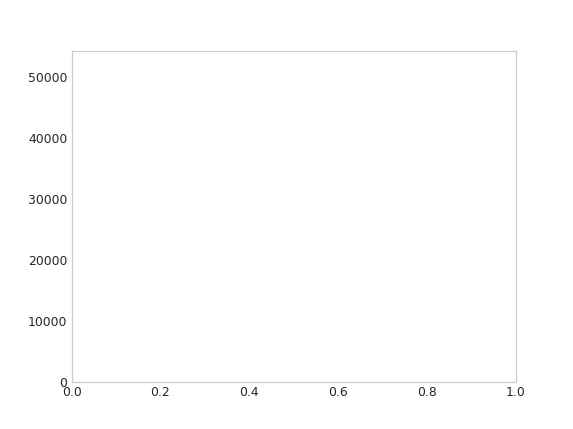

<IPython.core.display.Javascript object>


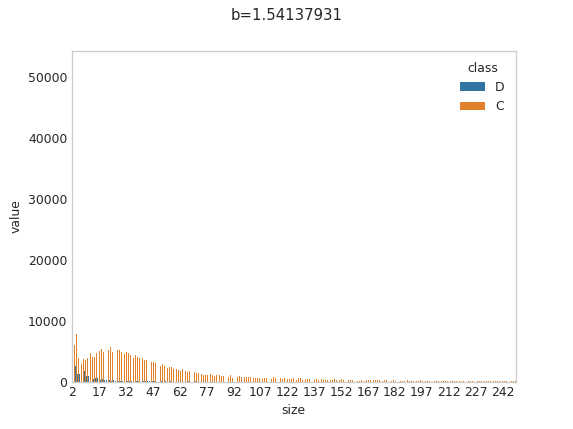

In [8]:
# fig = plt.figure(figsize=(10,6))
# plt.xlim(1999, 2016)
# plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.ylim(0, cluster_sizes[1, :, 2:250].max())
grid_kws = {"width_ratios": (1,)}
f, ax = plt.subplots(1, 1, gridspec_kw=grid_kws)
# plt.xlabel('N',fontsize=20)
# plt.ylabel('M',fontsize=20)
# plt.title('N-M distribution',fontsize=20)

mx = nm.max()
p = sns.barplot(x="size", y="value", hue="class", data=data,ax=ax)
for ind, label in enumerate(p.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


def animate(i):
#     data = overdose.iloc[:int(i+1)] #select data range
    clusts["value"] = cluster_sizes[0, i, 2:max_s].tolist() + cluster_sizes[1, i, 2:max_s].tolist()
    data = pd.DataFrame(clusts, columns=["class", "value", "size"])
    ax.clear()
    plt.ylim(0, cluster_sizes[1, :, 2:max_s].max())
    plt.suptitle(f"b={bs[i]}")
    p = sns.barplot(x="size", y="value", hue="class", data=data,ax=ax)
    for ind, label in enumerate(p.get_xticklabels()):
        if ind % 15 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
#     p.tick_params(labelsize=17)
#     plt.setp(p.lines,linewidth=7)
    
ani = animation.FuncAnimation(f, animate, frames=24, repeat=True)
ani.save("clus.mp4", writer=writer, dpi=300)

In [46]:
i = 15
clusts["value"] = cluster_sizes[0, i, 2:max_s].tolist() + cluster_sizes[1, i, 2:max_s].tolist()
data = pd.DataFrame(clusts, columns=["class", "value", "size"])
plt.suptitle(f"b={bs[i]}")
p = sns.barplot(x="size", y="value", hue="class", data=data,log=True)
for ind, label in enumerate(p.get_xticklabels()):
    if ind % 15 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

<IPython.core.display.Javascript object>


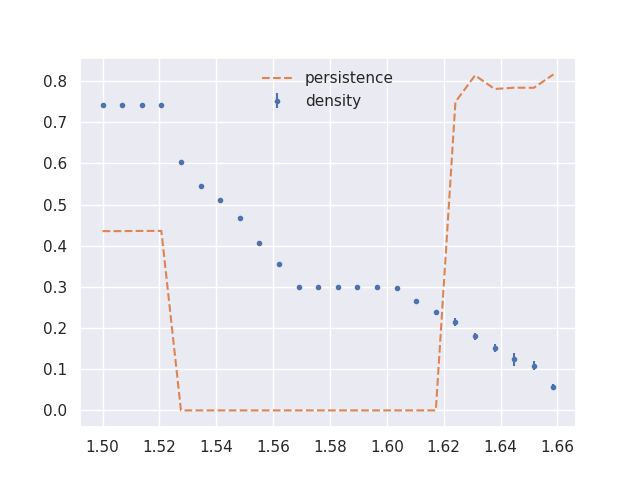

In [12]:
sns.set()
plt.errorbar(bs, density[:, :, 10000:].mean(axis=-1).mean(axis=-1), yerr=density[:, :, 10000:].mean(axis=-1).std(axis=-1), fmt=".", label="density")
plt.plot(bs, persistence.mean(axis=-1), "--", label="persistence")
plt.legend()

In [5]:
bs = [1.5       , 1.50689655, 1.5137931 , 1.52068966, 1.52758621,
      1.53448276, 1.54137931, 1.54827586, 1.55517241, 1.56206897,
      1.56896552, 1.57586207, 1.58275862, 1.58965517, 1.59655172,
      1.60344828, 1.61034483, 1.61724138, 1.62413793, 1.63103448,
      1.63793103, 1.64482759, 1.65172414, 1.65862069]
# nm = np.concatenate((np.load("data/part1/nmdistribution.npy"),
#                      np.load("data/part2/nmdistribution.npy"),
#                      np.load("data/part3/nmdistribution.npy"),
#                      np.load("data/part4/nmdistribution.npy")), axis=0).reshape((-1, 9, 9))
# p1 = np.load("data/part1/clustersizedist.npy").astype("int")
# p2 = np.load("data/part2/clustersizedist.npy").astype("int")
# p3 = np.load("data/part3/clustersizedist.npy").astype("int")
# p4 = np.load("data/part4/clustersizedist.npy").astype("int")

# siz = np.max([p1.shape[-1], p2.shape[-1], p3.shape[-1], p4.shape[-1]])
# cluster_sizes = np.concatenate((np.pad(p1, [(0, 0), (0, 0), (0, siz-p1.shape[-1])], 'constant'),
#                                 np.pad(p2, [(0, 0), (0, 0), (0, siz-p2.shape[-1])], 'constant'),
#                                np.pad(p3, [(0, 0), (0, 0), (0, siz-p3.shape[-1])], 'constant'),
#                                np.pad(p4, [(0, 0), (0, 0), (0, siz-p4.shape[-1])], 'constant')), axis=1)
persistence = np.concatenate((np.load("data/part1/persistence.npy"),
                     np.load("data/part2/persistence.npy"),
                     np.load("data/part3/persistence.npy"),
                     np.load("data/part4/persistence.npy")), axis=0)
density = np.concatenate((np.load("data/part1/density.npy"),
                     np.load("data/part2/density.npy"),
                     np.load("data/part3/density.npy"),
                     np.load("data/part4/density.npy")), axis=0)

FileNotFoundError: [Errno 2] No such file or directory: 'data/part1/persistence.npy'

In [7]:
# np.save("data/200MeanGame/nmdistribution.npy", nm)
# np.save("data/200MeanGame/clustersizedist.npy", cluster_sizes)
np.save("data/200MeanGame/persistence.npy", persistence)
np.save("data/200MeanGame/density.npy", density)

In [4]:
f_cs = np.linspace(0, 1, 20)

def trans_val(f_c, m, n):
    return (m+f_c)/(n+f_c)

In [5]:
bs = [0.9       , 0.91864407, 0.93728814, 0.9559322 , 0.97457627,
     0.99322034, 1.01186441, 1.03050847, 1.04915254, 1.06779661,
     1.08644068, 1.10508475, 1.12372881, 1.14237288, 1.16101695,
     1.17966102, 1.19830508, 1.21694915, 1.23559322, 1.25423729,
     1.27288136, 1.29152542, 1.31016949, 1.32881356, 1.34745763,
     1.36610169, 1.38474576, 1.40338983, 1.4220339 , 1.44067797,
     1.45932203, 1.4779661 , 1.49661017, 1.51525424, 1.53389831,
     1.55254237, 1.57118644, 1.58983051, 1.60847458, 1.62711864,
     1.64576271, 1.66440678, 1.68305085, 1.70169492, 1.72033898,
     1.73898305, 1.75762712, 1.77627119, 1.79491525, 1.81355932,
     1.83220339, 1.85084746, 1.86949153, 1.88813559, 1.90677966,
     1.92542373, 1.9440678 , 1.96271186, 1.98135593, 2.        ]
persistence_m = np.load("data/200MeanGame/persistence.npy")
density_m = np.load("data/200MeanGame/density.npy")

persistence_n = np.load("data/200NovakMayGame/persistence.npy")
density_n = np.load("data/200NovakMayGame/density.npy")

In [8]:
bsw

[1.5,
 1.50689655,
 1.5137931,
 1.52068966,
 1.52758621,
 1.53448276,
 1.54137931,
 1.54827586,
 1.55517241,
 1.56206897,
 1.56896552,
 1.57586207,
 1.58275862,
 1.58965517,
 1.59655172,
 1.60344828,
 1.61034483,
 1.61724138,
 1.62413793,
 1.63103448,
 1.63793103,
 1.64482759,
 1.65172414,
 1.65862069]

<IPython.core.display.Javascript object>


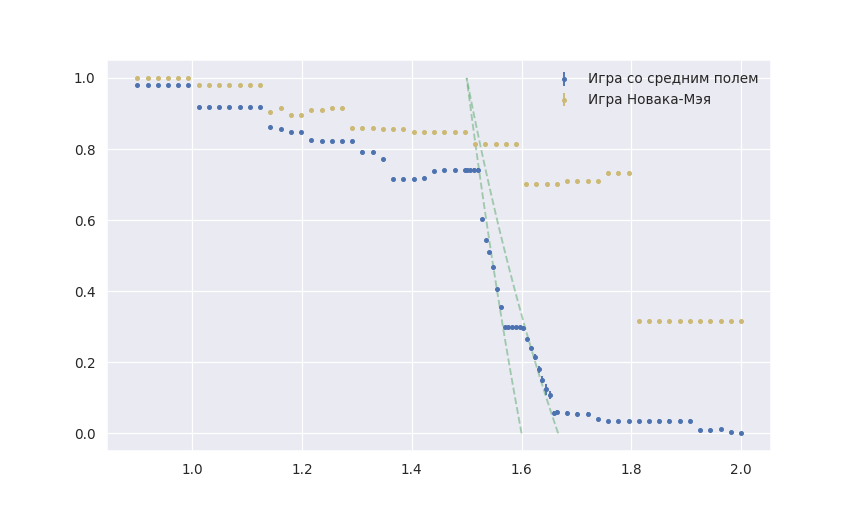

In [19]:
sns.set()
bs = np.asarray(bs)
# plt.xlim(.9, 2)
plt.errorbar(bs[(bs < 1.5) |(bs > 1.66)], density_m[:, :, 10000:].mean(axis=-1).mean(axis=-1)[(bs < 1.5) |(bs > 1.66)], yerr=density_m[:, :, 10000:].mean(axis=-1).std(axis=-1)[(bs < 1.5) |(bs > 1.66)], fmt=".b", label="Игра со средним полем")
plt.errorbar(bsw, density[:, :, 10000:].mean(axis=-1).mean(axis=-1), yerr=density[:, :, 10000:].mean(axis=-1).std(axis=-1), fmt=".b")
plt.errorbar(bs, density_n[:, :, 10000:].mean(axis=-1).mean(axis=-1), yerr=density_n[:, :, 10000:].mean(axis=-1).std(axis=-1), fmt=".y", label="Игра Новака-Мэя")
plt.plot(trans_val(f_cs, 8, 5), f_cs, "g--", alpha=.5)
plt.plot(trans_val(f_cs, 5, 3), f_cs, "g--", alpha=.5)
# for x in transitions:
#     plt.plot(x, f_cs, 'g--', alpha=.3) #, label="For game with average")

plt.legend()

In [16]:
bs = np.array(bs)
(bs < 1.5) |(bs > 1.66)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [35]:
plt.savefig("figures/density_NovakMay_Mean_game.png", dpi=500, quality=95)

In [6]:
persistence_sq = np.load("data/200MeanGame/persistence.npy")
persistence_tr = np.load("data/MeanTriangle/persistence.npy")

<IPython.core.display.Javascript object>


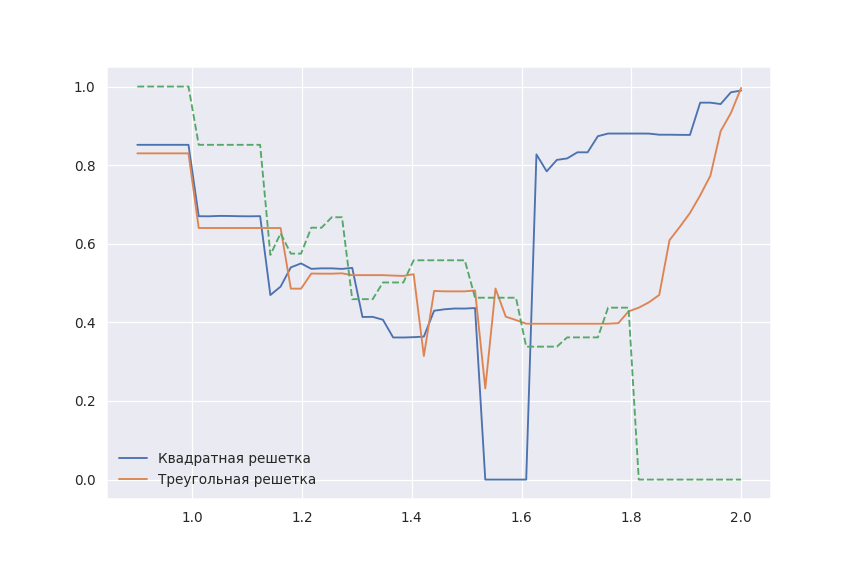

In [8]:
sns.set()
plt.plot(bs, persistence_sq.mean(axis=-1), label="Квадратная решетка")
plt.plot(bs, persistence_tr.mean(axis=-1), label="Треугольная решетка")
plt.plot(bs, persistence_n.mean(axis=-1), "--")
plt.legend()

In [16]:
plt.savefig("figures/persistence.png", dpi=500, quality=95)